## KNN算法实现约会网站预测以及手写识别系统

In [3]:
from numpy import *
import operator

### 构造数据集

In [4]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [5]:
group,labels = createDataSet()

In [6]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [7]:
labels

['A', 'A', 'B', 'B']

### 分类器函数，用来选择输入的变量属于哪个分类

In [8]:
def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]


In [9]:
classify0([0,0],group,labels,3)

'B'

## 将文本记录转换为Numpy

In [10]:
def file2matrix(filename):
    fr = open(filename)
    arrayLines = fr.readlines()
    numberLines = len(arrayLines)
    returnMat = zeros((numberLines,3))
    classLabelVector = []
    index = 0
    for line in arrayLines:
        line = line.strip()
        lineFromLine = line.split('\t')
        returnMat[index,:] = lineFromLine[0:3]
        classLabelVector.append(int(lineFromLine[-1]))
        index +=1
    return returnMat,classLabelVector

In [11]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')

In [12]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [13]:
datingLabels

[3,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,


### 分析数据，使用Matplotlib创建散点图  


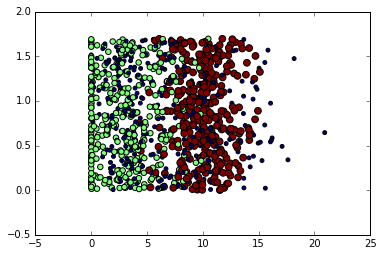

In [14]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

### 归一化特征值

In [15]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet / tile(ranges, (m,1))
    return normDataSet, ranges, minVals

In [16]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [17]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [18]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [19]:
minVals

array([ 0.      ,  0.      ,  0.001156])

### 测试算法，分类器针对约会网站的测试

In [20]:
def datingClassTest():
    hoRatio = 0.1
    datingDatMat,daingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTest = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTest):
        classifierResult = classify0(normMat[i,:],normMat[numTest:m,:],datingLabels[numTest:m],3)
        print 'the classifierResult is %d, the real answer is %d' % (classifierResult, datingLabels[i])
        if(classifierResult!= datingLabels[i]):
           errorCount +=1.0
        print "the total error rate is %f" % (errorCount/float(numTest))

In [21]:
datingClassTest()

the classifierResult is 3, the real answer is 3
the total error rate is 0.000000
the classifierResult is 2, the real answer is 2
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 3, the real answer is 3
the total error rate is 0.000000
the classifierResult is 3, the real answer is 3
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 3, the real answer is 3
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 1, the real answer is 1
the total error rate is 0.000000
the classifierResult is 2, t

### 约会网站预测完整函数

In [22]:
def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentGame = float(raw_input("percentage of time spent playing video games?"))
    ffMiles = float(raw_input("frequent filer miles earned per year?"))
    iceCream = float(raw_input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentGame,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print "you will probably like the person:",resultList[classifierResult-1]

In [23]:
classifyPerson()

percentage of time spent playing video games?10
frequent filer miles earned per year?10000
liters of ice cream consumed per year?0.5
you will probably like the person: in small doses


### 使用k邻近算法实现手写识别数字

#### 将图像数据转换成测试向量

In [24]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [25]:
img2vector('testDigits/0_13.txt')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
from os import listdir
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        print "the classifier result is %d,thr real answer is %d" % (classifierResult,classNumStr)
        if(classifierResult!=classNumStr):
            errorCount += 1.0
    print 'the total number of error is %d' % errorCount
    print 'the total error rate is %f' % (errorCount/float(mTest))

In [27]:
handwritingClassTest()

the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answer is 0
the classifier result is 0,thr real answ

the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 1,thr real answer is 1
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answer is 2
the classifier result is 2,thr real answ

the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 3,thr real answer is 3
the classifier result is 4,thr real answer is 4
the classifier result is 4,thr real answer is 4
the classifier result is 4,thr real answer is 4
the classifier result is 4,thr real answ

the classifier result is 5,thr real answer is 5
the classifier result is 3,thr real answer is 5
the classifier result is 6,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answer is 5
the classifier result is 5,thr real answ

the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answer is 7
the classifier result is 7,thr real answ

the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answer is 9
the classifier result is 9,thr real answ